# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
north_df.head(5)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [2]:
south_df = pd.read_csv("SouthCallCenter.csv")
south_df.head(5) 

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

In [3]:
north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [4]:
south_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [5]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [6]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [7]:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [8]:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [9]:
south_df.shape

(314, 15)

In [10]:
north_df.shape

(245, 15)

#### EDA Question 1A:  How many reps are in the North branch?  

In [11]:
#Code Used:
north_counts_rep = north_df["Rep ID"].value_counts()
north_counts_rep


Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [12]:
#Code Used:
south_counts_rep = south_df["Rep ID"].value_counts()
south_counts_rep

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [13]:
#checking to see which columns are numeric
df_numeric = north_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'Lost Call' 'Abandoned' 'Busy Minutes' 'Not Ready Minutes'
 'Incoming Wait Time' 'During Call Wait Time' 'Calls']


In [14]:
#running .mean method on select columns of the selected dataframe
north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [15]:
south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [16]:
#counting the total calls taken in each time block with value_counts method
north_counts_rep = north_df['Time Block'].value_counts()
north_counts_rep

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [17]:
south_counts_rep = south_df['Time Block'].value_counts()
south_counts_rep

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [18]:
#sums the totals of the two data frames for the column
company_counts_rep = north_counts_rep + south_counts_rep
display(company_counts_rep)

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: The missing data rows are all for outgoing calls - so it's correct for there to be no data here. I would replace the data with a value so it is not empty and to keep the rest of data. We need to keep the columns but don't want to replace with values that intefere or falsify results. I tried replacing with a word but then was unable to do calculations so replaced it with integer of 0. 

<AxesSubplot:>

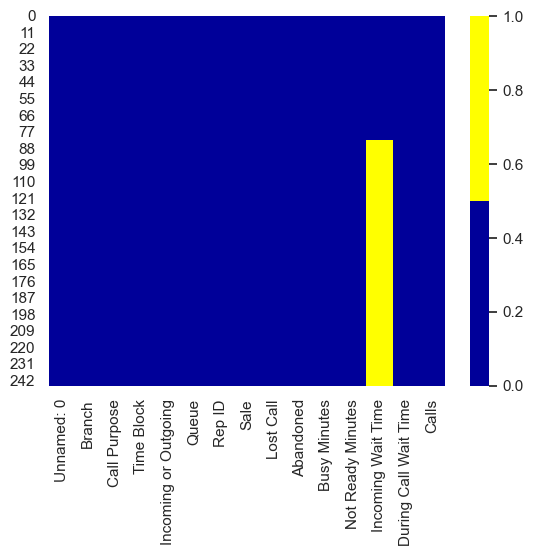

In [19]:
# Code Used
# Add Additional Cells as needed.
cols = north_df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))


<AxesSubplot:>

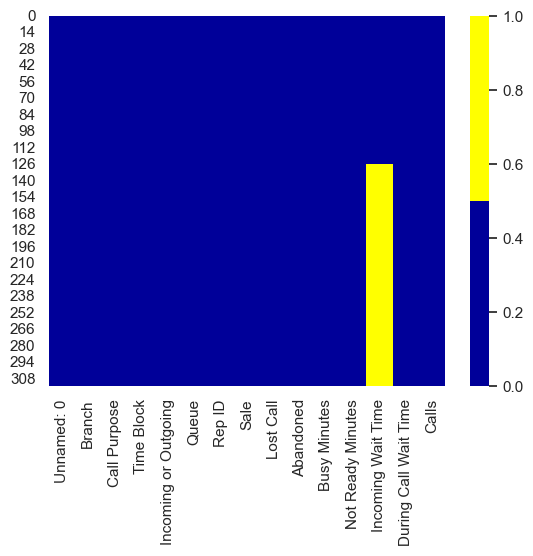

In [20]:
# Code Used
# Add Additional Cells as needed.
cols = south_df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(south_df[cols].isnull(), cmap=sns.color_palette(colours))


In [21]:
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [22]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [23]:
#filled in missing data with 0. then viewed the tail to check that empty values were changed to 0 - they're all at end of dataframes because they're all "outgoing"
north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(0) 
north_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,0.0,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,0.0,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,0.0,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,0.0,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,0.0,4,1


In [24]:
south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].fillna(0)
south_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1
313,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,0.0,3,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue? 
##### Record your answer by double clicking here:
> Your Answer: I used .strip to fix it but am not sure how it came about yet. I think it might just be from someone accidentally typing an extra yes, or they sold them two things?

In [26]:
#Code Used
# Add Additional Cells as needed.
### try nunique, look at .strip and look at why the value is there

north_df['Sale'] = north_df['Sale'].str.strip( )
print(north_df['Sale'].value_counts())

NO     234
YES     11
Name: Sale, dtype: int64


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: I dropped the row that was serving as a unique identifier while searching for and dropping duplicates. I used the .drop and .drop_duplicates methods and then compared the original data frame against the new one to check that duplicates were gone and the shape counts changed. 

In [27]:
print(north_df.shape)
north_df = north_df.drop('Unnamed: 0', axis=1).drop_duplicates()
print(north_df.shape)

(245, 15)
(243, 14)


In [28]:
print(south_df.shape)
south_df = south_df.drop('Unnamed: 0', axis=1).drop_duplicates()
print(south_df.shape)

(314, 15)
(311, 14)


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I don't notice anything unnecessary yet so I haven't taken action on this. I created a list of features with a high percentage of the same value. It showed features with over 95% rows being the same value. Actually, branch and calls dont have unique data there. Even though the value for each row in Calls is 1, it would not be good to delete the column because it allows forteh Calls column to be used for easy calculations later. The branch name column doesn't seem necessary but will be useful when merged with the other df.

In [29]:
#checking for columns that have the highest percentage of duplicate values all in one column to see if they are needed at all
num_rows = len(north_df.index)
low_information_cols = [] 

for col in north_df.columns:
    cnts = north_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
North    243
Name: Branch, dtype: int64

Sale: 95.47325%
NO     232
YES     11
Name: Sale, dtype: int64

Lost Call: 97.94239%
0    238
1      5
Name: Lost Call, dtype: int64

Abandoned: 97.11934%
0    236
1      7
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    243
Name: Calls, dtype: int64



In [30]:
#checking for columns that have the highest percentage of duplicate values all in one column to see if they are needed at all
num_rows = len(south_df.index)
low_information_cols = [] 

for col in south_df.columns:
    cnts = south_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
South    311
Name: Branch, dtype: int64

Sale: 98.07074%
NO     305
YES      6
Name: Sale, dtype: int64

Lost Call: 96.46302%
0    300
1     11
Name: Lost Call, dtype: int64

Abandoned: 98.71383%
0    307
1      4
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    311
Name: Calls, dtype: int64



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [31]:
#I needed to figure out how to combine data frames and rename the new one so the old ones stayed the same. I tried a couple kinds of merge initially but the result wasn't helpful
df = pd.concat([north_df, south_df], ignore_index=True, sort=False)
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1
550,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1
551,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1
552,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls


In [32]:
#grouped by rep id and stored it in a new variable to run a sum on the numerical values of the table and keep the rep id column the same in original dataframes. 
group_rep_id = north_df.groupby('Rep ID').sum()
sorted_df_north = group_rep_id.sort_values(by=["Calls"], ascending=False)
sorted_df_north

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Brent,0,1,362,71,17.0,117,37
Lilly,0,2,307,59,37.0,88,30
Duke,2,0,292,56,39.0,85,29
Todd,1,0,296,58,21.0,97,29
Joe,0,0,246,48,32.0,78,25
Cam,1,0,233,46,32.0,66,24
Xander,1,0,244,44,20.0,68,24
Andy,0,3,228,43,36.0,65,23
Amanda,0,1,218,41,12.0,58,22


In [33]:
group_rep_id_south = south_df.groupby('Rep ID').sum()
sorted_df_south = group_rep_id_south.sort_values(by=["Calls"], ascending=False)
sorted_df_south

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Eric,0,0,361,54,47.0,112,35
Randy,3,1,312,63,47.0,96,32
Helga,0,2,292,58,36.0,95,31
Sandy,1,0,317,59,34.0,96,31
George,0,0,298,53,41.0,87,29
Karl,1,0,287,61,26.0,85,28
Kate,0,0,283,60,34.0,80,28
Josh,3,0,260,50,31.0,83,26
Susan,2,0,267,53,35.0,88,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.28
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? South branch and company wide are both outside or 2-5. However, they are exceeding expectations of the company standards and that is a good thing. North Branch is higher but still well within the optimal range. 

In [34]:
AR_north = north_df['Abandoned'].sum()/north_df['Calls'].sum()*100
AR_north

2.880658436213992

In [35]:
AR_south = south_df['Abandoned'].sum()/south_df['Calls'].sum()*100
AR_south

1.2861736334405145

In [36]:
AR_all = df['Abandoned'].sum()/df['Calls'].sum()*100
AR_all

1.9855595667870036

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 42%, 81 calls
- South Branch = 53%, 125 calls
- Company Wide = 48%, 206 calls

In [51]:
short_wait_north = (north_df['Incoming Wait Time'] <= 2 and != 0).sum() 
print(short_wait_north)

incoming_north = (north_df["Incoming or Outgoing"] == "Incoming").sum()
print(incoming_north)

north_service_level = incoming_north/short_wait_north*100
north_service_level.round()

SyntaxError: invalid syntax (1708629263.py, line 1)

In [47]:
short_wait_north = (north_df['Incoming Wait Time'] <= 2).sum() 
print(short_wait_north)

incoming_north = (north_df["Incoming or Outgoing"] == "Incoming").sum()
print(incoming_north)

north_service_level = incoming_north/short_wait_north*100
north_service_level.round()

195
81


42.0

In [48]:
short_wait_south = (south_df['Incoming Wait Time'] <= 2).sum() 
print(short_wait_south)

incoming_south = (south_df["Incoming or Outgoing"] == "Incoming").sum()
print(incoming_south)

south_service_level = incoming_south/short_wait_south*100
south_service_level.round()

234
125


53.0

In [49]:
short_wait_company = (df['Incoming Wait Time'] <= 2).sum() 
print(short_wait_company)

incoming_company = (df["Incoming or Outgoing"] == "Incoming").sum()
print(incoming_company)

company_service_level = incoming_company/short_wait_company*100
company_service_level.round()

429
206


48.0

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.01


In [40]:
avg_speed_north = ((north_df["Incoming Wait Time"].sum())) / ((north_df["Incoming or Outgoing"] == "Incoming").sum())
print(avg_speed_north.round(2))

3.04


In [41]:
avg_speed_south = ((south_df["Incoming Wait Time"].sum())) / ((south_df["Incoming or Outgoing"] == "Incoming").sum())
print(avg_speed_south.round(2))

3.0


In [42]:
avg_speed_company = ((df["Incoming Wait Time"].sum())) / ((df["Incoming or Outgoing"] == "Incoming").sum())
print(avg_speed_company.round(2))

3.01


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = north_df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#> try histogram. find code. it may show information better
#Your Code Here:
print(abandonment_rates)


{'A': 0.0425531914893617, 'B': 0.020134228187919462, 'C': 0.0072992700729927005, 'D': 0.017241379310344827}


Text(0, 0.5, 'Average Abandonment Rate')

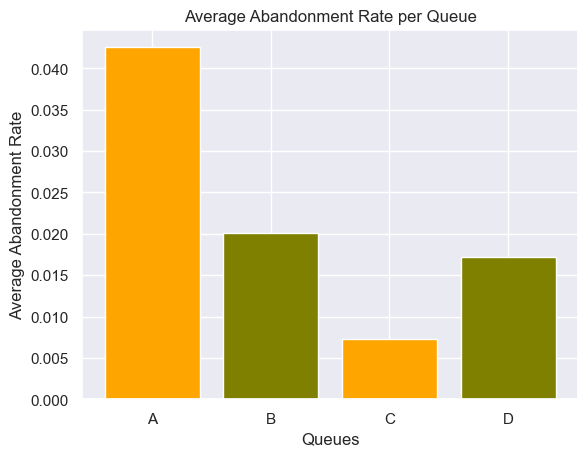

In [43]:
# Create visualization 1 here
# Import any additional libraries needed with alias

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]
#Your Code Here:
print(abandonment_rates)
keys = abandonment_rates.keys()
values = abandonment_rates.values()
plt.bar(keys, values, align = 'center', color = ['orange','olive'])
plt.title('Average Abandonment Rate per Queue')
plt.xlabel('Queues')
plt.ylabel('Average Abandonment Rate')

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

Text(0.5, 1.0, 'Something Good')

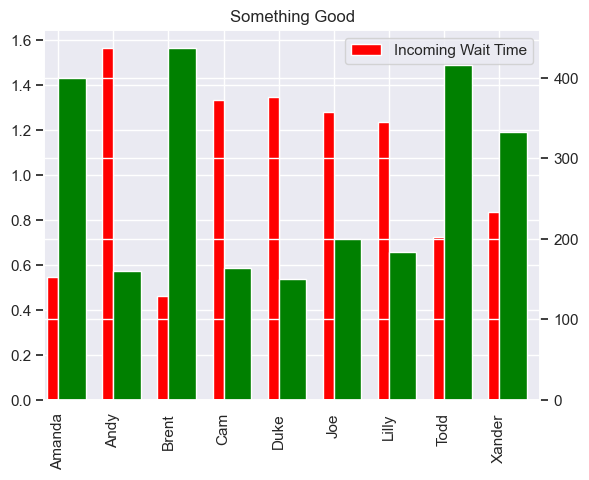

In [44]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
#create figure and axis #1
fig, ax1 = plt.subplots()
#fig = plt.fgure(figsize=(12,8))

width=0.2


#set the twin axis
ax2 = ax1.twinx()
ax2.grid(False)

##plt.legend(['Incoming', 'Outgoing'], loc='upper left', prop={'size':12}, fontsize=12)

#plot line chart on axis#1
north_plt.plot(kind='bar', color='red', ax=ax1, width=width, position=1)
service_level['Service Level %'].plot(kind='bar', color='green', ax=ax2, position=0)

plt.title('Something Good')



plt.xlabel('Rep ID', color='black', fontsize=12, fontweight='bold')
plt.ylabel('Incoming Wait Time', color='black', fontsize=12, fontweight='bold')

plt.legend(['Rep ID'], loc='upper left', prop={'size':10}, fontsize=12)

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                120
                 Incoming                 73
Name: Incoming or Outgoing, dtype: int64


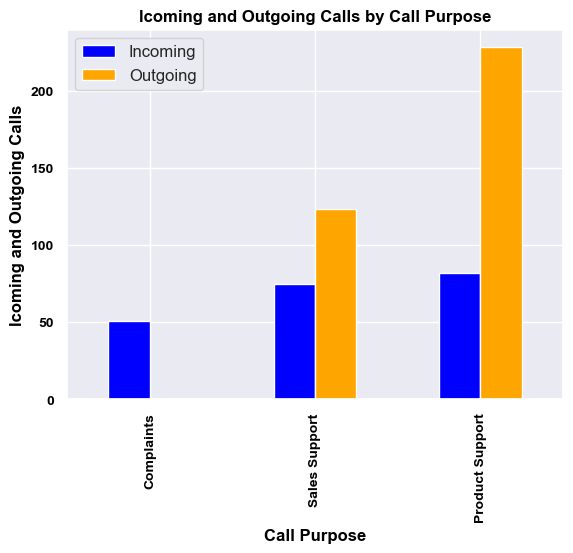

In [45]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
data = {
    "Complaints": [51, 0], 
    "Sales Support": [75, 123],
    "Product Support": [82, 228]
    
}

viz3 = pd.DataFrame(data).T
viz3.plot(kind="bar", color=['blue', 'orange'])

plt.xlabel('Call Purpose', color='black', fontsize=12, fontweight='bold')
plt.ylabel('Icoming and Outgoing Calls', color='black', fontsize=12, fontweight='bold')

plt.title('Icoming and Outgoing Calls by Call Purpose', color='black', fontsize=12, fontweight='bold')

plt.legend(['Incoming', 'Outgoing'], loc='upper left', prop={'size':12}, fontsize=12)

plt.xticks(color='black', fontsize=10, fontweight='bold')
plt.yticks(color='black', fontsize=10, fontweight='bold')
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: south branch has higher service level; south has lower abandonment rate; North has higher speed of answer. South brandch is operating more efficiently.




#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: North has teo fewer reps than the south branch and seems to struggle more. they can use more reps. 



#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: maybe revenue?maybe external ocmparisons. information on competitors - not in same data frame but for analysis overall maybe?


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [46]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: